In [3]:
import numpy as np 
import pandas as pd
from sklearn import datasets

---
### 2.1 샘플 데이터 적재하기
> 사이킷런의 toy datasets
- load_boston : 보스턴 주택가격에 대한 503개의 샘플, Regression 학습용 
- load_iris : 150개의 iris 데이터, 분류학습용 
- load_digits : 손으로 쓴 숫자 이미지 1,979개, 이미지 분류 학습용

---

In [4]:
digits = datasets.load_digits()
## 특성과 타겟 행렬 생성 
features = digits.data
target = digits.target
## 첫번째 샘플 확인
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
## key값 출력
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [14]:
## description 출력 
digits['DESCR'][:1000]

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

---
### 2.2 모의 데이터셋 만들기
---

In [16]:
from sklearn.datasets import make_regression      ## 선형회귀용 데이터셋 
from sklearn.datasets import make_classification  ## 분류용 데이터셋
from sklearn.datasets import make_blobs           ## 군집용 데이터셋

import matplotlib.pyplot as plt 

In [17]:
## 1. linear regression : 특성행렬, 타겟벡터, 정답계수 생성 
features, target, coefficients = make_regression(n_samples = 100, 
                                                 n_features = 3, 
                                                 n_informative = 3, 
                                                 n_targets = 1, 
                                                 noise = 0.0, 
                                                 coef = True, 
                                                 random_state = 1
                                                 )

print("Feature_matrix", "\n", features[:5])
print("Target_vector", "\n", target[:5])

Feature_matrix 
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]
 [ 0.12910158  0.50274088  1.6169496 ]
 [-0.69166075 -0.6871727  -0.39675353]]
Target_vector 
 [ -10.37865986   25.5124503    19.67705609  149.50205427 -121.65210879]


In [22]:
## 2. classification : 특성행렬, 타겟벡터 생성 
features, target = make_classification(n_samples = 100, 
                                      n_features = 3, 
                                      n_informative = 3, 
                                      n_redundant = 0, 
                                      n_classes = 2, 
                                      weights = [.25, .75], 
                                      random_state = 1
                                      )

print("Feature_matrix", "\n", features[:5])
print("Target_vector", "\n", target[:5])

Feature_matrix 
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]
 [-0.70612133 -1.03281003  1.39477986]
 [ 0.8444902  -0.61997189  1.08791124]]
Target_vector 
 [1 0 0 1 1]


In [24]:
## 3. clustering : 특성행렬, 타겟벡터 생성 
features, target = make_blobs(n_samples = 100, 
                              n_features = 2, 
                              centers = 3, 
                              cluster_std = 0.5, 
                              shuffle = True, 
                              random_state = 1
                              )

print("Feature_matrix", "\n", features[:5])
print("Target_vector", "\n", target[:5])

Feature_matrix 
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]
 [ -9.88266514  -3.57234296]
 [ -5.80071933  -8.27754549]]
Target_vector 
 [0 1 1 1 2]


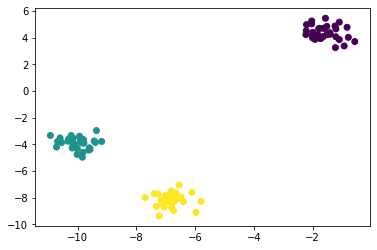

In [26]:
## make_blobs의 결과로 지정한대로 3개의 군집이 생성되었다. 
plt.scatter(features[:,0], features[:,1], c = target)
plt.show()

---
### 2.3 CSV 파일 적재 
- pandas의 read_csv를 사용 
- skiprows : 읽어올때 건너뛸 행의 갯수를 지정
- nrows : 읽어올 행의 갯수를 지정
---

In [27]:
url = 'http://tinyurl.com/simulated-data'
df = pd.read_csv(url)
df.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


In [29]:
df2 = pd.read_csv(url, skiprows = 5, nrows = 10)
df2

,6,2015-01-01 00:00:04,0
0,9,2015-01-01 00:00:05,0
1,7,2015-01-01 00:00:06,0
2,1,2015-01-01 00:00:07,0
3,6,2015-01-01 00:00:08,0
4,9,2015-01-01 00:00:09,0
5,5,2015-01-01 00:00:10,0
6,5,2015-01-01 00:00:11,0
7,8,2015-01-01 00:00:12,0
8,9,2015-01-01 00:00:13,0
9,8,2015-01-01 00:00:14,0


---
### 2.4 엑셀파일 적재하기
- 패키지 설치 필요: pip install xlrd 
- sheet_name 옵션 필요 
---

In [30]:
!pip install xlrd

In [40]:
url = "http://tinyurl.com/simulated-excel"

df3 = pd.read_excel(url, sheet_name = 0, header = 0) 
df3.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


In [41]:
df3.info

<bound method DataFrame.info of     integer            datetime  category
0         5 2015-01-01 00:00:00         0
1         5 2015-01-01 00:00:01         0
2         9 2015-01-01 00:00:02         0
3         6 2015-01-01 00:00:03         0
4         6 2015-01-01 00:00:04         0
..      ...                 ...       ...
95        9 2015-01-01 00:01:35         0
96        8 2015-01-01 00:01:36         0
97        6 2015-01-01 00:01:37         0
98        8 2015-01-01 00:01:38         0
99        1 2015-01-01 00:01:39         0

[100 rows x 3 columns]>

---
### 2.5 Json 파일 적재하기 
- pd.read_json 사용 
- orient : json 파일이 어떻게 구성되었는지를 지정 
 - cf. json 파일의 형태 = cloumn, split, record, index, value 등이 있다. 
 - 가장 많이 쓰이는 column 형태는 {열: {인덱스: 값, ...}, ...} 형태 
---

In [42]:
url = 'http://tinyurl.com/simulated-json'

df4 = pd.read_json(url, orient = 'columns')
df4.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


In [43]:
df4.info

<bound method DataFrame.info of     integer            datetime  category
0         5 2015-01-01 00:00:00         0
1         5 2015-01-01 00:00:01         0
2         9 2015-01-01 00:00:02         0
3         6 2015-01-01 00:00:03         0
4         6 2015-01-01 00:00:04         0
..      ...                 ...       ...
95        9 2015-01-01 00:01:35         0
96        8 2015-01-01 00:01:36         0
97        6 2015-01-01 00:01:37         0
98        8 2015-01-01 00:01:38         0
99        1 2015-01-01 00:01:39         0

[100 rows x 3 columns]>

---
### 2.6 SQL DB로 부터 적재하기 
- pd.read_sql_query 사용 
- sqlalchemy 설치 후, create_engine 함수 사용
---

In [44]:
!pip install sqlalchemy

In [52]:
from sqlalchemy import create_engine 
## colab에서 실행시에 사용 
!wget https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/sample.db -O sample.db  
db_connection = create_engine('sqlite:///sample.db')

--2021-12-01 08:02:06--  https://github.com/rickiepark/machine-learning-with-python-cookbook/raw/master/sample.db
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/machine-learning-with-python-cookbook/master/sample.db [following]
--2021-12-01 08:02:06--  https://raw.githubusercontent.com/rickiepark/machine-learning-with-python-cookbook/master/sample.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8192 (8.0K) [application/octet-stream]
Saving to: ‘sample.db’

sample.db           100%[===================>]   8.00K  --.-KB/s    in 0s      

2021-12-01 08:02:07 (50.3 MB/s) - ‘sample.db’

In [54]:
## table_name = data 
df5 = pd.read_sql_query("select * from data", db_connection)
df5.head()

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94
2,Tina,Ali,36,31,57
3,Jake,Milner,24,2,62
4,Amy,Cooze,73,3,70


In [57]:
## cf. sql_table : 전체 테이블을 모두 불러온다 
df6 = pd.read_sql_table("data", db_connection)
df6

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25
1,Molly,Jacobson,52,24,94
2,Tina,Ali,36,31,57
3,Jake,Milner,24,2,62
4,Amy,Cooze,73,3,70
